# Prediction model 

## Q1

What is the sum of the squared errors when use our original model to predict the weights in this test set?

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [42]:
mpl.style.use("fivethirtyeight")

In [43]:
training_data = pd.read_csv("")
test_data = pd.read_csv("")

In [44]:
def to_days(weeks):
  days = weeks*7
  return days

In [45]:
def to_ounces(grams):
  ounces = grams/28.34952
  return ounces

In [46]:
test_data['gestate'] = test_data['gestate'].apply(to_days)

In [47]:
test_data['weight'] = test_data['weight'].apply(to_ounces)

Model using original data

In [51]:
m, b = np.polyfit(training_data['Gestational Days'], training_data['Birth Weight'], 1)


In [52]:
test_data["predicted wt"] = m * test_data["gestate"] + b #predicted weights of test data with linear model from training data

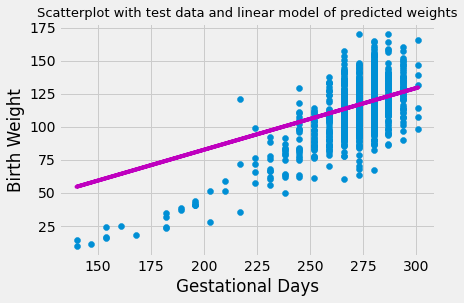

In [53]:
#scatter plot with the test data and with the linear model of predicted weights

plt.scatter(test_data['gestate'], test_data['weight'])
plt.title('Scatterplot with test data and linear model of predicted weights', fontsize = 13)
plt.xlabel('Gestational Days')
plt.ylabel('Birth Weight')
plt.plot(test_data['gestate'], m *test_data['gestate'] + b, color = 'm');

A scatter plot of the residuals that one can get when one predicts these Philly baby weights. Is this the sign of a good regression model?

In [54]:
test_data["residuals"] = test_data["weight"] - test_data["predicted wt"] 

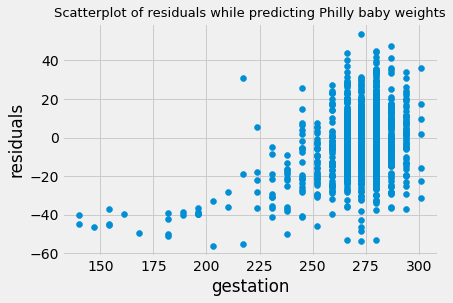

In [55]:
plt.scatter(test_data["gestate"], test_data["residuals"]);
plt.title('Scatterplot of residuals while predicting Philly baby weights', fontsize = 13)
plt.ylabel("residuals"); #residuals should look like a blob, for premature babies, this model is not doing well.
plt.xlabel("gestation");

This is not a good regression model. In a good regression model, residuals need to be centered around 0 and without a pattern.

What is the sum of the squared errors when you use original model to predict the weights in this test set?

In [17]:
result = np.sum((test_data["residuals"]) **2)
print("The sum of squared errors is " + str(result) )

The sum of squared errors is 343229.53225092846


## Q2

There are a few data points here that were outliers. Trying to find the effect that these outliers have on the regression line.

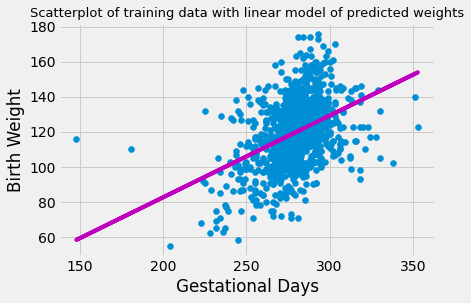

In [58]:
#first, I wanted to see which ones were the outliers
plt.scatter(training_data['Gestational Days'], training_data['Birth Weight'])
plt.title('Scatterplot of training data with linear model of predicted weights', fontsize = 13)
plt.xlabel('Gestational Days')
plt.ylabel('Birth Weight')
plt.plot(training_data['Gestational Days'], m *training_data['Gestational Days'] + b, color = 'm');

I chose that they are an outlier if their Gestational days  are <220 and >330, since those are the noticeable outliers.

In [57]:
training_data2 = training_data[training_data['Gestational Days'] > 220] #keeping all of the data that has gestational days over 220

In [59]:
training_data2 = training_data2[training_data2['Gestational Days'] < 330] #keeping all of the data that has gestational days under 330

In [60]:
#new linear model without outliers
m1, b1 = np.polyfit(training_data2['Gestational Days'], training_data2['Birth Weight'], 1)

In [61]:
test_data["new predicted wt"] = m1 * test_data["gestate"] + b1 #predicted weights with data from training

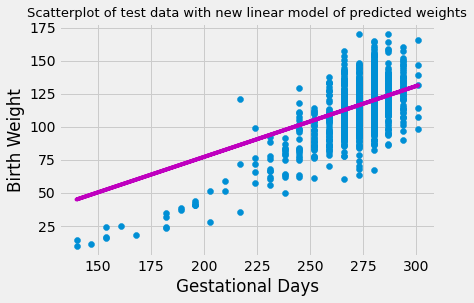

In [62]:
#scatter plot with the test data and with the new linear model
plt.scatter(test_data['gestate'], test_data['weight'])
plt.title('Scatterplot of test data with new linear model of predicted weights', fontsize = 13)
plt.xlabel('Gestational Days')
plt.ylabel('Birth Weight')
plt.plot(test_data['gestate'], m1 *test_data['gestate'] + b1, color = 'm');

Since it is difficult to observe visually whether it is more accurate, I will re-do the sum of squared errors. 

In [67]:
test_data["new residuals"] = test_data["weight"] - test_data["new predicted wt"] 

In [68]:
result = np.sum((test_data["new residuals"]) **2)
print("The sum of squared errors is " + str(result) )

The sum of squared errors is 322688.5740285965


The sum of squared errors is 322688, which is less than 353299 (from original model). We want to minimize residual sum of squares (RSS). Therefore, the new linear model without outliers is better than the previous one. This means that the removal of outliers result in a more predictive model.